<a href="https://colab.research.google.com/github/AdheFirmansyah/DataScience/blob/main/PolynomialFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Dataset Tanaman Padi Sumatera, Indonesia </h1>

<p> Pengambilan data diperoleh melalui website BPS pada kategori tanaman pangan utama dari 8 provinsi di pulau Sumatera yaitu Nanggroe Aceh Darussalam (NAD), Sumatera Utara, Riau, Jambi, Sumatera Selatan, Bengkulu dan Lampung. Data yang digunakan adalah data dari tahun 1993 hingga tahun 2020 untuk dataset padi. Data memuat hasil produksi tahunan dan luas panen atau luas lahan. Kemudian data perubahan cuaca diperoleh melalui website BMKG untuk data harian curah hujan, kelembapan, dan temperatur rata-rata atau suhu rata-rata dari tahun 1993 hingga tahun 2020. </p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

print('mounting ok')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mounting ok


In [2]:
import pandas as pd
import numpy as np

#visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#add
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Data_Tanaman_Padi_Sumatera_version_1.csv')
print ('Berikut Tampilan Data :\n')
df.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

Berikut Tampilan Data :



,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.000000,323589.000000,1627.000000,82.000000,26.060000
1,Aceh,1994,1299699.000000,329041.000000,1521.000000,82.120000,26.920000
2,Aceh,1995,1382905.000000,339253.000000,1476.000000,82.720000,26.270000
3,Aceh,1996,1419128.000000,348223.000000,1557.000000,83.000000,26.080000
4,Aceh,1997,1368074.000000,337561.000000,1339.000000,82.460000,26.310000


In [4]:
df.tail().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
219,Lampung,2016,3831923.000000,390799.000000,2317.600000,79.400000,26.450000
220,Lampung,2017,4090654.000000,396559.000000,1825.100000,77.040000,26.360000
221,Lampung,2018,2488641.910000,511940.930000,1385.800000,76.050000,25.500000
222,Lampung,2019,2164089.330000,464103.420000,1706.400000,78.030000,27.230000
223,Lampung,2020,2604913.290000,545149.050000,2211.300000,75.800000,24.580000


In [5]:
df.shape

(224, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [7]:
cek = pd.DataFrame({
    'Data Kosong': df.isnull().sum(),
    'Data Duplikat': df.duplicated().sum(),
    'Data NaNN': df.isna().sum(),
    'Type Data': df.dtypes
})

cek.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,Data Kosong,Data Duplikat,Data NaNN,Type Data
Provinsi,0,0,0,object
Tahun,0,0,0,int64
Produksi,0,0,0,float64
Luas Panen,0,0,0,float64
Curah hujan,0,0,0,float64
Kelembapan,0,0,0,float64
Suhu rata-rata,0,0,0,float64


In [8]:
df.corr()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
Tahun,1.000000,0.182527,-0.045951,-0.047645,-0.033474,0.004923
Produksi,0.182527,1.000000,0.905622,-0.042129,-0.052316,0.041160
Luas Panen,-0.045951,0.905622,1.000000,-0.092975,-0.061121,0.115726
Curah hujan,-0.047645,-0.042129,-0.092975,1.000000,0.056466,-0.228699
Kelembapan,-0.033474,-0.052316,-0.061121,0.056466,1.000000,-0.407799
Suhu rata-rata,0.004923,0.041160,0.115726,-0.228699,-0.407799,1.000000


In [9]:
prov = df['Provinsi'].value_counts()
fig = px.pie(df, 
             values=prov.values, 
             names=prov.index, 
             title='Komposisi Data Provinsi',
             height=500)

fig.show()

In [10]:
total_produksi_prov = df.groupby(['Provinsi'])['Produksi'].sum().sort_values(ascending = False).reset_index()

fig = px.bar(df, y=total_produksi_prov['Produksi'], x=total_produksi_prov['Provinsi'], text_auto='.2s',template='plotly_dark',
             color = total_produksi_prov['Provinsi'])
fig.update_layout(title='Produksi Padi Berdasar Provinsi',
                   xaxis_title='Provinsi',
                   yaxis_title='Jumlah Produksi')
fig.show()

In [11]:
timeline_prov = df.groupby(['Provinsi','Tahun'] )['Produksi'].sum().reset_index()

fig = px.line(x = timeline_prov['Tahun'], y = timeline_prov['Produksi'],color =timeline_prov['Provinsi'], template='plotly_dark', markers=True)
fig.update_layout(title='Produksi Padi Dari Tahun ke Tahun Berdasarkan Provinsi',
                   xaxis_title='Tahun',
                   yaxis_title='Jumlah Produksi')
fig.show()

In [12]:

fig = px.scatter(df, x="Luas Panen", y="Produksi",template='plotly_dark', color="Provinsi")
fig.show()

In [13]:
fig = px.scatter(df, x="Curah hujan", y="Produksi",template='plotly_dark')
fig.show()

In [14]:
timeline_prov = df.groupby(['Provinsi','Tahun'] )['Produksi'].sum().reset_index()

fig = px.scatter(df, x="Suhu rata-rata", y="Produksi",template='plotly_dark')
fig.show()

In [15]:
fig = px.scatter(df, x="Kelembapan", y="Produksi",template='plotly_dark')
fig.show()

In [16]:
curah_hujan_prov = df.groupby(['Provinsi'])['Curah hujan'].mean().sort_values(ascending = False).reset_index()

fig = px.bar(df, y=curah_hujan_prov['Curah hujan'], x=curah_hujan_prov['Provinsi'], text_auto='.2s',template='plotly_dark',
             color = total_produksi_prov['Provinsi'])
fig.update_layout(title='Provinsi dengan jumlah curah hujan tinggi',
                   xaxis_title='Provinsi',
                   yaxis_title='Curah Hujan')
fig.show()

In [17]:
suhu_prov = df.groupby(['Provinsi'])['Kelembapan'].mean().sort_values(ascending = False).reset_index()

fig = px.bar(df, y=suhu_prov['Kelembapan'], x=suhu_prov['Provinsi'], text_auto='.2s',template='plotly_dark',
             color = total_produksi_prov['Provinsi'])
fig.update_layout(title='Produksi Padi Berdasar Provinsi',
                   xaxis_title='Provinsi',
                   yaxis_title='Jumlah Produksi')
fig.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error

In [19]:
def MAPE(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def performance(model,X_train,y_train,y_pred,y_test):
    print('Train Score:',round(model.score(X_train,y_train), 4))
    print('Test Score (R2 Score):',round(r2_score(y_test,y_pred), 4))
    print('Metrics In Testing Data: ')
    print('MSE:',round(mean_squared_error(y_test,y_pred), 4))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_test,y_pred)), 4))
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print('Max Error:',max_error(y_test,y_pred))
    print('MAPE:',round(MAPE(y_test, y_pred), 2), '%')

Simple Linear Reg

In [20]:
linreg = LinearRegression()

In [21]:
X = df[['Luas Panen']]
y = df[['Produksi']]

In [22]:
linreg.fit(X,y)
lr_pred = linreg.predict(X)

In [23]:
print('Test Score (R2 Score):',round(r2_score(y,lr_pred), 4))

Test Score (R2 Score): 0.8202


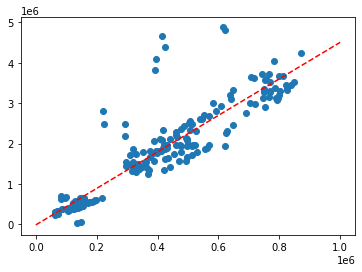

In [24]:
X_vis = np.linspace(0,1000000,1000).reshape(-1,1)
y_vis = linreg.predict(X_vis)
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '--r')

plt.show()

# Multiple Linear Reg

In [25]:
df_copy = df.copy()

In [26]:
df_copy.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [28]:
#label encode for categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = le.fit_transform(df_copy[col])

In [29]:
df_copy.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,0,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,0,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,0,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,0,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,0,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [30]:
X_copy = df_copy.drop(['Produksi'], axis = 1)
y_copy = df_copy[['Produksi']]  #target

X_train, X_test, y_train, y_test = train_test_split(X_copy[['Luas Panen']], y_copy, test_size=0.33)

In [32]:
# 1. Linear Regression
model = LinearRegression()
#fitting model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Performance Linear :\n')
print(performance(model,X_train,y_train,y_pred,y_test))
print('')

# 2. Polynomial Feature - quadratic 
X_train_poly = X_train
X_test_poly = X_test
#transform polynomial
quad_feature = PolynomialFeatures(degree = 2)
X_train_quad = quad_feature.fit_transform(X_train_poly)
X_test_quad = quad_feature.fit_transform(X_test_poly)
#fitting
model.fit(X_train_quad, y_train)
#predict
y_pred_train_poly = model.predict(X_train_quad)
y_pred_test_poly = model.predict(X_test_quad)
print('Performance Linear dengan poly 2 degree:\n')
print(performance(model,X_train_quad,y_train,y_pred_test_poly,y_test))
print('')

# 3. Polynomial Feature - cubic 

cubic_feature = PolynomialFeatures(degree = 3)
X_train_cubic = cubic_feature.fit_transform(X_train_poly)
X_test_cubic = cubic_feature.fit_transform(X_test_poly)
#fitting
model.fit(X_train_cubic, y_train)
#predict
y_pred_train_poly_cubic = model.predict(X_train_cubic)
y_pred_test_poly_cubic = model.predict(X_test_cubic)
print('Performance Linear dengan poly 3 degree:\n')
print(performance(model,X_train_cubic,y_train,y_pred_test_poly_cubic,y_test))
print('')


Performance Linear :

Train Score: 0.8137
Test Score (R2 Score): 0.8303
Metrics In Testing Data: 
MSE: 253867280112.4861
RMSE: 503852.4388
MAE: 275316.2146083788
Max Error: 2318946.3208835144
MAPE: 18.08 %
None

Performance Linear dengan poly 2 degree:

Train Score: 0.8195
Test Score (R2 Score): 0.8321
Metrics In Testing Data: 
MSE: 251151564551.1581
RMSE: 501150.2415
MAE: 265503.92648590746
Max Error: 2220605.576955013
MAPE: 17.37 %
None

Performance Linear dengan poly 3 degree:

Train Score: 0.8197
Test Score (R2 Score): 0.8323
Metrics In Testing Data: 
MSE: 250779289213.7711
RMSE: 500778.6829
MAE: 269391.7244169566
Max Error: 2213331.314858556
MAPE: 18.01 %
None



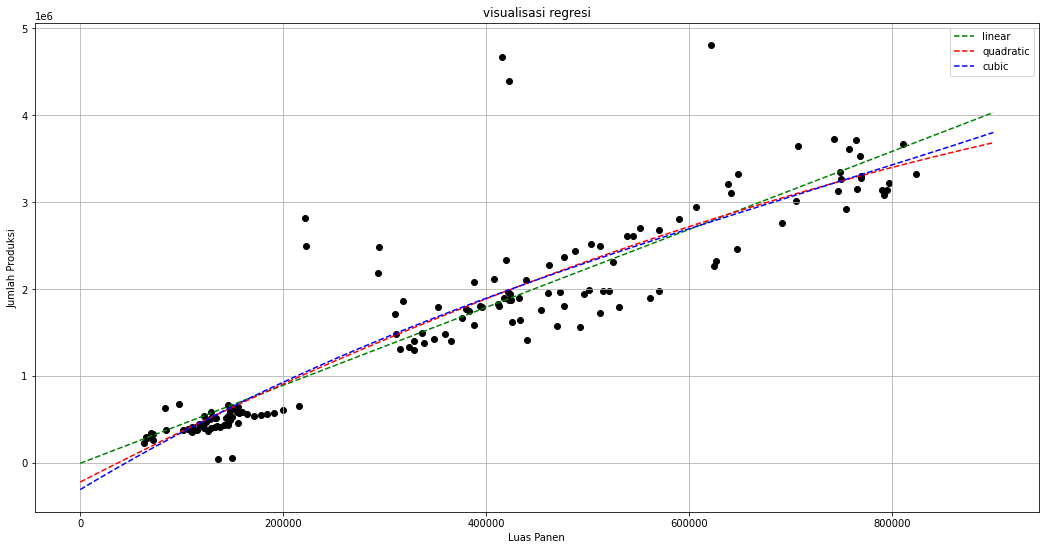

In [33]:
plt.figure(figsize=(18,9))

plt.scatter(X_train, y_train, c='black')

model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0,900000,1000).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--g', label = 'linear')

#quad
quad_feature = PolynomialFeatures(degree = 2)
X_train_quad = quad_feature.fit_transform(X_train)
model.fit(X_train_quad, y_train)
X_vis_quad = quad_feature.transform(X_vis)
y_vis = model.predict(X_vis_quad)
plt.plot(X_vis, y_vis, '--r', label = 'quadratic')

#cubic
cubic_feature = PolynomialFeatures(degree = 3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--b', label = 'cubic')

plt.title('visualisasi regresi')
plt.legend()
plt.xlabel('Luas Panen')
plt.ylabel('Jumlah Produksi')
plt.legend()
plt.grid(True)
plt.show()

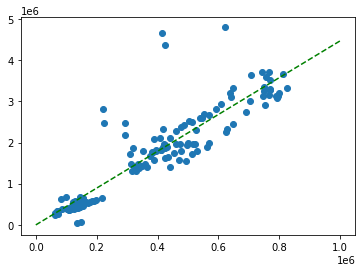

In [34]:
plt.scatter(X_train, y_train)

model = LinearRegression()
model.fit(X_train, y_train)

X1_vis = np.linspace(0,1000000,1000).reshape(-1,1)
y1_vis = model.predict(X1_vis)
plt.plot(X1_vis, y1_vis, '--g')
plt.show()


In [36]:
X1 = df_copy.drop(['Produksi'], axis = 1)
y1 = df_copy['Produksi']

In [37]:
#scala
std_scaler = StandardScaler()
X_1 = std_scaler.fit_transform(X1)

#minmax
minmax_scaler = MinMaxScaler()
X_1 = minmax_scaler.fit_transform(X_1)

In [38]:
#split data 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33)

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
performance(lr_model,X_train,y_train,lr_pred,y_test)

Train Score: 0.9144
Test Score (R2 Score): 0.8031
Metrics In Testing Data: 
MSE: 299221455651.7427
RMSE: 547011.3853
MAE: 264399.3041179245
Max Error: 2686829.619795926
MAPE: 29.37 %


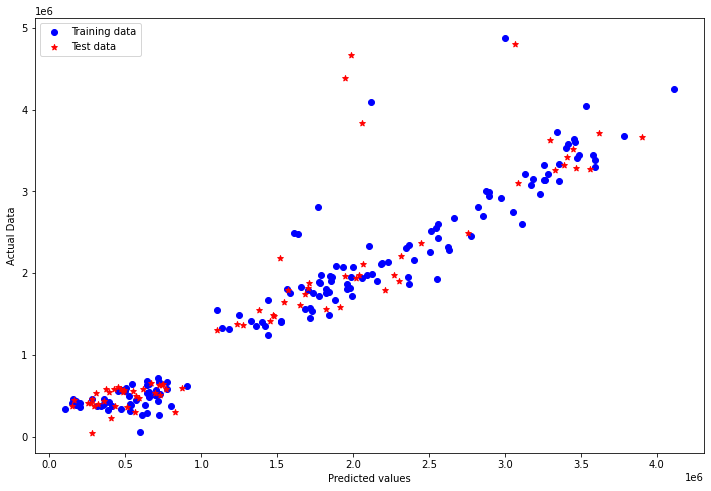

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(lr_model.predict(X_train),y_train, c='blue', marker='o', label='Training data')
plt.scatter(lr_pred,y_test, c='red', marker='*', label='Test data')
# plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Actual Data')
plt.legend(loc='upper left')
# plt.hlines(y=0, xmin=0, xmax=100000, lw=2, color='k')
# plt.xlim([-1000, 100000])
plt.show()

In [ ]:
# #no of features
# nof_list=np.arange(1,6)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X_copy,y_copy, test_size = 0.33, random_state = 0)
#     model = LinearRegression()
#     rfe = RFE(model,step = nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))